<a href="https://colab.research.google.com/github/IrynaBarnych/AI_EX/blob/main/exam/%D0%95%D0%BA%D0%B7%D0%B0%D0%BC%D0%B5%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основні умови

Студент обирає **одне завдання** на вибір, або узгоджує власний проект з викладачем. Студент повен показати розуміння роботи з даними та побудови моделі.

Студент самостійно пише увесь код до початку екзамену. Під час екзамену кожен студент презентує свою роботу викладачу та відповідає на основні питання, що стосуються проекту, також можуть бути додаткові питання на кристалики\більші бали.

Робота повинна бути оформлена як готовий код, який на прохання викладача можна буде запустити або внести певні зміни. На вибір студента можна використовувати Colab чи Kaggle

# Завдання 1

Дані про ... Опис даних:
* *case_id:* Ідентифікатор порядкового номеру досліду
* *Vpr:* Швидкість притиру, мм/сек
* *Vjpr:* Напруга живлення притиру, В:
* *Vngw:* Частота обертання шліфувального круга, об/хв
* *Vdan:* Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц
* *Mater:* Матеріал притиру
* *Depertm:* Присутній на дослідженнях (представник кафедри)
* *Days:* Дні експерименту (1-5)
* *Ppr:* Потужність притиру, кВт
* *Ef:* Ефективність (%)
* *W:* Витрати енергії, kWh
* *T:* Температура, °C
* *Sh:* Вимірювання шуму, дБ
* *Model:* Модель станка
* *Angle:* Кут нахилу або нахил шліфувального станка

## Умова

**Тип задачі**

Модель повинна спрогнозувати кількість днів, які пацієнт провів у лікарні. Вам потрібно розв'язати цю задачу як задачу класифікації(спрогнозувати діапазон днів) та задачу регресії(спрогнозувати саму кількість днів), у випадку задачі регресії вам потрібно згенерувати нову цільову ознаку Vjpr_new на основі Vjpr, як середнє значення діапазону.

При тренуванні моделей у вас може бути лише одина ознака Vjpr чи Vjpr_new

**Провести попередній аналіз даних**
* ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків
* перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити
* перевірити дані на наявність викидів, при необхідності створити **нові дані** без викидів
* вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
  1. чи видно викиди
  2. скільки є піків
  3. чи зміщенна гістограма вліво\вправо
* вивести ящики з вусами для числових ознак, дати опис ящикам:
  1. в якому діапазоні зосереджено 25%\50%\75%\100% даних
  2. чи є викиди
  3. чи зміщені ящики вліво\вправо
* вивести гістограми з кількостями для категоріальних ознак
* вивести групові ящики з вусами для числової та категоріальної ознаки, вказати від якої категоріальної ознаки залежить числова ознака і як саме
* вивести точкові діаграми для числових ознак, вказати для яких числових ознак є залежність

**Побудова моделі для задач класифікації та регресії**
* при необхідності згенерувати нові ознаки
* самостійно обрати модель для тренування або обрати за допомогою `optuna`
* розділити **дані без викидів** на тренувальні та тестові, можливо валідаційні якщо потрібно
* вибрати метрики для оцінки якості моделі, вибір пояснити
* побудувати препроцесор
* натренувати модель
* вивести метрики для тестових даних, дати оцінку якості моделі
* зберегти натреновану модель

**Додатково**
* порівняти результат моделі на неочищених від викидів даних
* застосувати підбір гіперпараметрів

In [2]:
import pandas as pd
# Зчитування файлу Excel
df = pd.read_excel("/content/дані.xlsx")
# Виведення перших декількох рядків для перевірки
df.head()

,case_id,Vpr,Vjpr,Vngw,Vdan,Mater,Depertm,Days,Ppr,Ef,W,T,Sh,Mode,Angle
0,1.0,0.10,0-0.2,680.0,15.0,мінералокераміка,лаборант,перший,0.0015,83.0,0.03,25.0,65.0,XYZ-500,7.0
1,2.0,0.40,0-0.2,975.0,23.0,мінералокераміка,аспірант,другий,0.0096,22.0,0.05,30.0,70.0,ABG-2000,8.0
2,3.0,0.05,0-0.2,570.0,37.0,металокераміка,професор,третій,0.0228,57.0,0.07,28.0,68.0,CNC-8000,6.0
3,4.0,0.60,0-0.2,1980.0,47.0,мінералокераміка,аспірант,четвертий,0.1782,95.0,0.04,32.0,72.0,EFG-450,9.0
4,5.0,0.15,0-0.2,2400.0,52.0,металокераміка,професор,п'ятий,0.0624,41.0,0.06,27.0,67.0,JKL-1200,10.0


ознайомитись з даними, визначити які ознаки є числовими, а які категоріальні, якщо потрібно то змінити тип стовпчиків

In [4]:
df.head()

,case_id,Vpr,Vjpr,Vngw,Vdan,Mater,Depertm,Days,Ppr,Ef,W,T,Sh,Mode,Angle
0,1.0,0.10,0-0.2,680.0,15.0,мінералокераміка,лаборант,перший,0.0015,83.0,0.03,25.0,65.0,XYZ-500,7.0
1,2.0,0.40,0-0.2,975.0,23.0,мінералокераміка,аспірант,другий,0.0096,22.0,0.05,30.0,70.0,ABG-2000,8.0
2,3.0,0.05,0-0.2,570.0,37.0,металокераміка,професор,третій,0.0228,57.0,0.07,28.0,68.0,CNC-8000,6.0
3,4.0,0.60,0-0.2,1980.0,47.0,мінералокераміка,аспірант,четвертий,0.1782,95.0,0.04,32.0,72.0,EFG-450,9.0
4,5.0,0.15,0-0.2,2400.0,52.0,металокераміка,професор,п'ятий,0.0624,41.0,0.06,27.0,67.0,JKL-1200,10.0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37 entries, 0 to 47
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case_id  37 non-null     float64
 1   Vpr      37 non-null     float64
 2   Vjpr     37 non-null     float64
 3   Vngw     37 non-null     float64
 4   Vdan     37 non-null     float64
 5   Ppr      37 non-null     float64
 6   Ef       37 non-null     float64
 7   W        37 non-null     float64
 8   T        37 non-null     float64
 9   Sh       37 non-null     float64
 10  Angle    37 non-null     float64
dtypes: float64(11)
memory usage: 3.5 KB


перевірити дані на наявність пропущених значень, зробити висновки які дані залишити, а які видалити

In [5]:
df=df.dropna()

In [6]:
df= df.drop(columns=['Mater'])

In [7]:
df= df.drop(columns=['Depertm'])

In [8]:
df= df.drop(columns=['Mode'])

In [9]:
df= df.drop(columns=['Days'])

In [29]:
df= df.drop(columns=['case_id'])

In [30]:
df.head()

,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle
0,0.10,0.1,680.0,15.0,0.0015,83.0,0.03,25.0,65.0,7.0
1,0.40,0.1,975.0,23.0,0.0096,22.0,0.05,30.0,70.0,8.0
2,0.05,0.1,570.0,37.0,0.0228,57.0,0.07,28.0,68.0,6.0
3,0.60,0.1,1980.0,47.0,0.1782,95.0,0.04,32.0,72.0,9.0
4,0.15,0.1,2400.0,52.0,0.0624,41.0,0.06,27.0,67.0,10.0


перевірити дані на наявність викидів, при необхідності створити нові дані без викидів

In [13]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

In [32]:
df1 = df.copy()

for column_name in df1.columns:
  if df1.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df1 = remove_outliers(df1, column_name)

df1.shape

(37, 10)

In [34]:
# Заміна діапазонів на середні значення
def replace_range_with_average(value):
    if isinstance(value, str) and '-' in value:
        start, end = map(float, value.split('-'))
        return (start + end) / 2
    else:
        return value

df['Vjpr'] = df['Vjpr'].apply(replace_range_with_average)

In [35]:
def create_dataset_without_outliers(df, column_name):
    column = df[column_name]

    q1 = column.quantile(q=0.25)
    q3 = column.quantile(q=0.75)

    iqr = q3 - q1

    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    mask = (column >= lower) & (column <= upper)

    return df[mask]

# Створення копії датасету без викидів
df_without_outliers = df.copy()

for column_name in df_without_outliers.columns:
    if df_without_outliers.dtypes[column_name] in ("object", "datetime64[ns]"):
        continue

    df_without_outliers = create_dataset_without_outliers(df_without_outliers, column_name)

df_without_outliers.shape


(37, 10)

вивести гістограми для числових ознак, кількість стовпчиків має бути рівна квадратному кореню з кількості рядків, дати опис гістограмам:
- чи видно викиди
- скільки є піків
- чи зміщенна гістограма вліво\вправо

Text(0.5, 0, 'Vjpr')

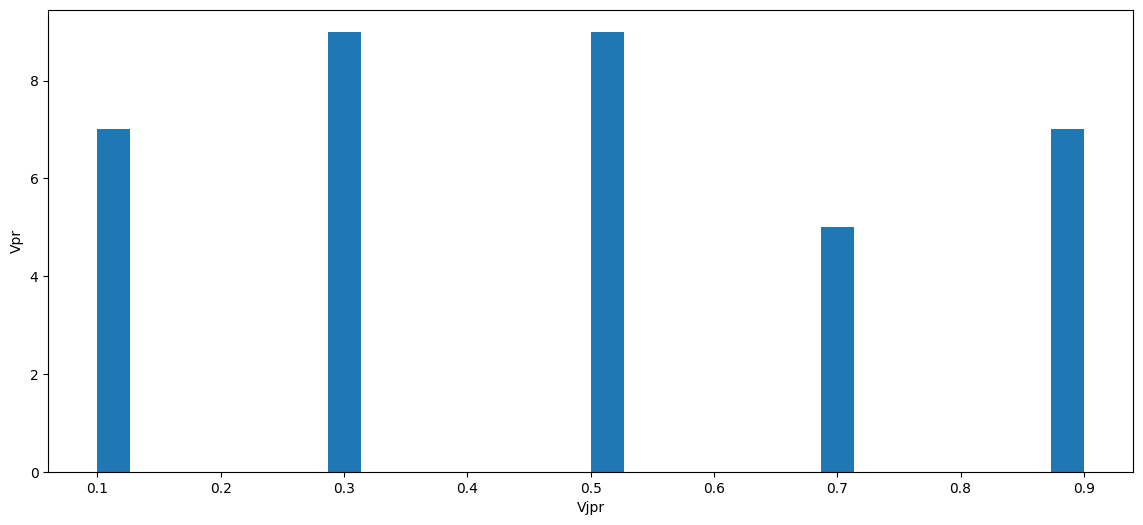

In [36]:
ax = df['Vjpr'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Vpr')
ax.set_xlabel('Vjpr')

Text(0.5, 0, 'Vdan')

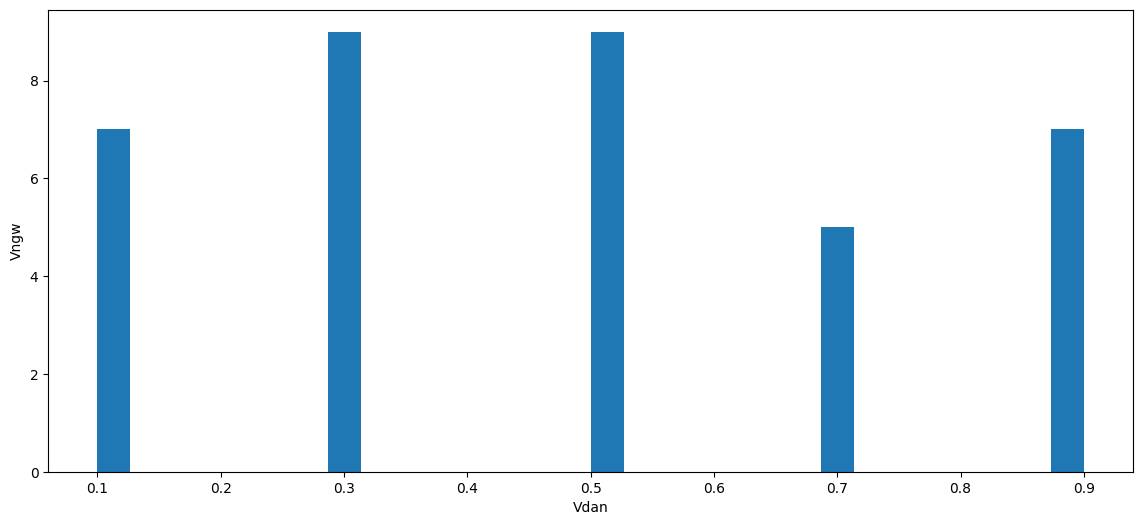

In [37]:
ax = df['Vjpr'].plot(kind='hist',    # тип діаграми hist
                             bins=30,        # кількість стовпчиків
                             figsize=(14,6)  # розмір зображення(в дюймах)
                             )


ax.set_ylabel('Vngw')
ax.set_xlabel('Vdan')

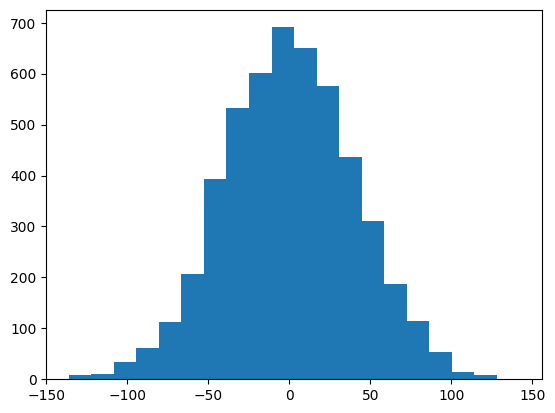

In [38]:
import numpy as np
import matplotlib.pyplot as plt

norm_data = np.random.normal(loc=0,      # середнє арифметичне
                             scale=40,   # стандартне відхилення
                             size=(5000,))

plt.hist(norm_data, bins=20)
plt.show()

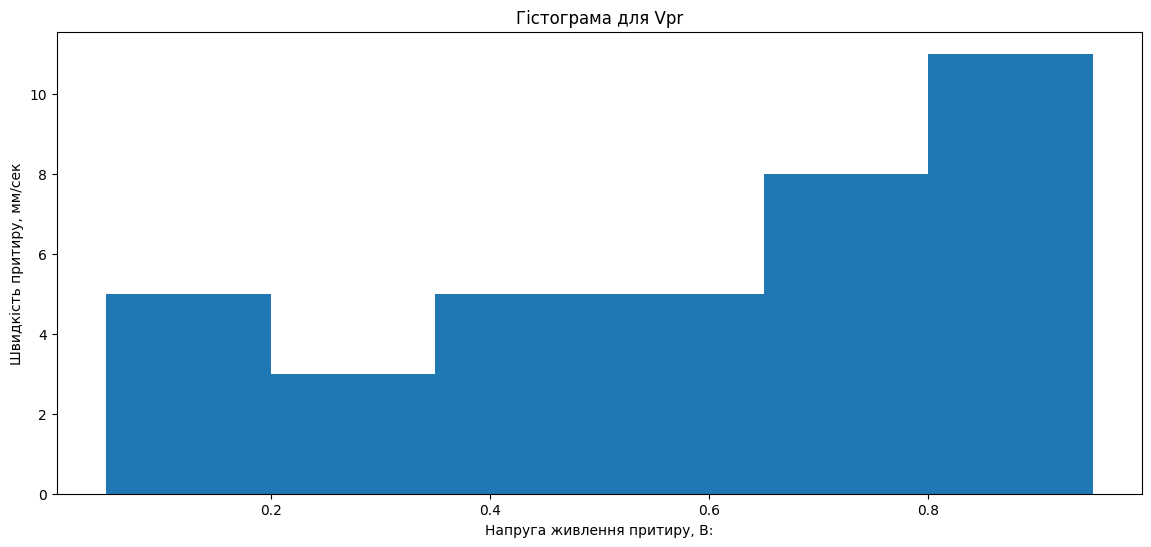

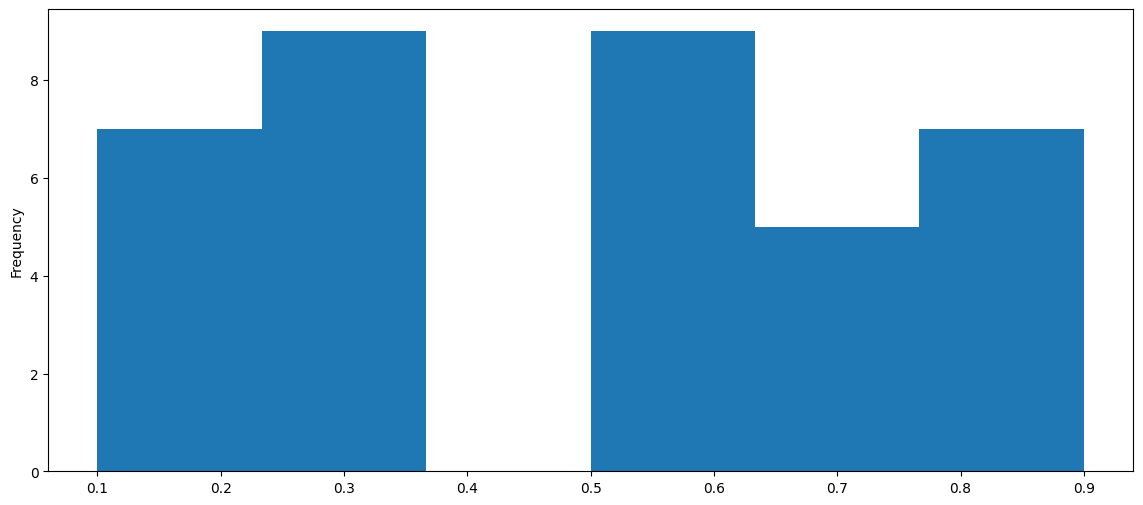

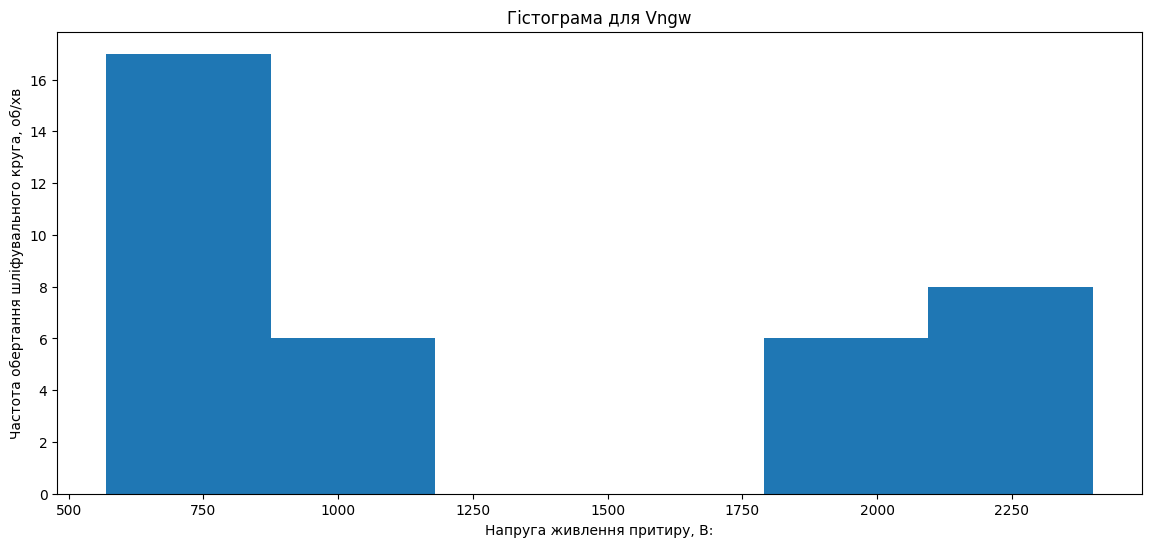

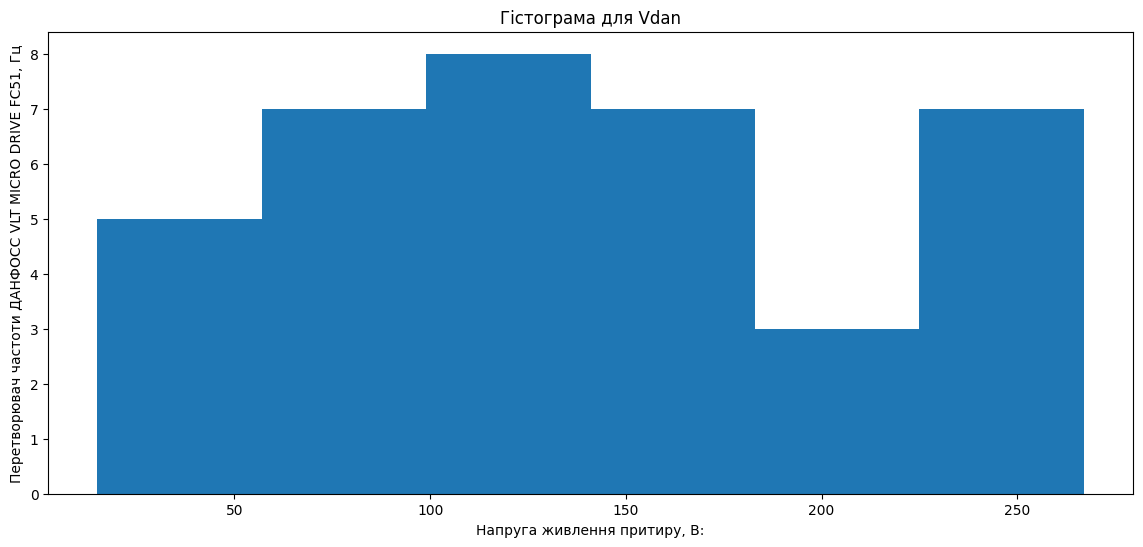

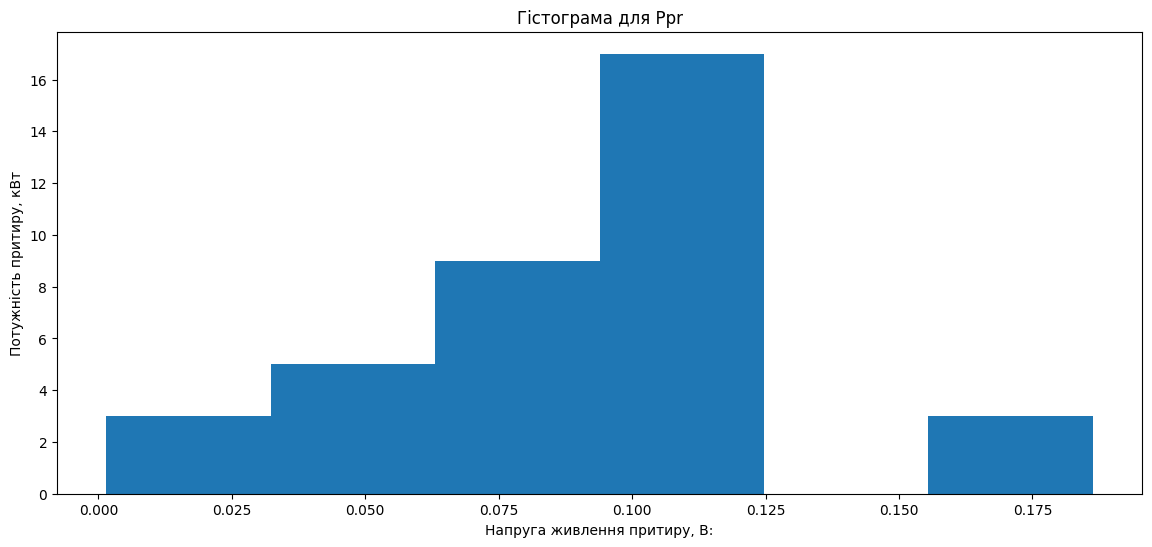

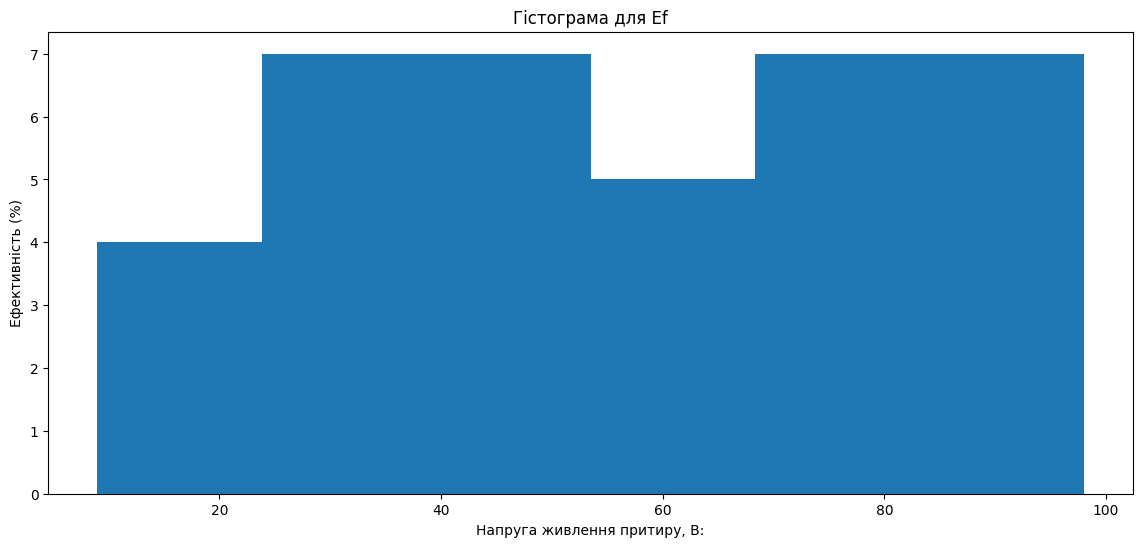

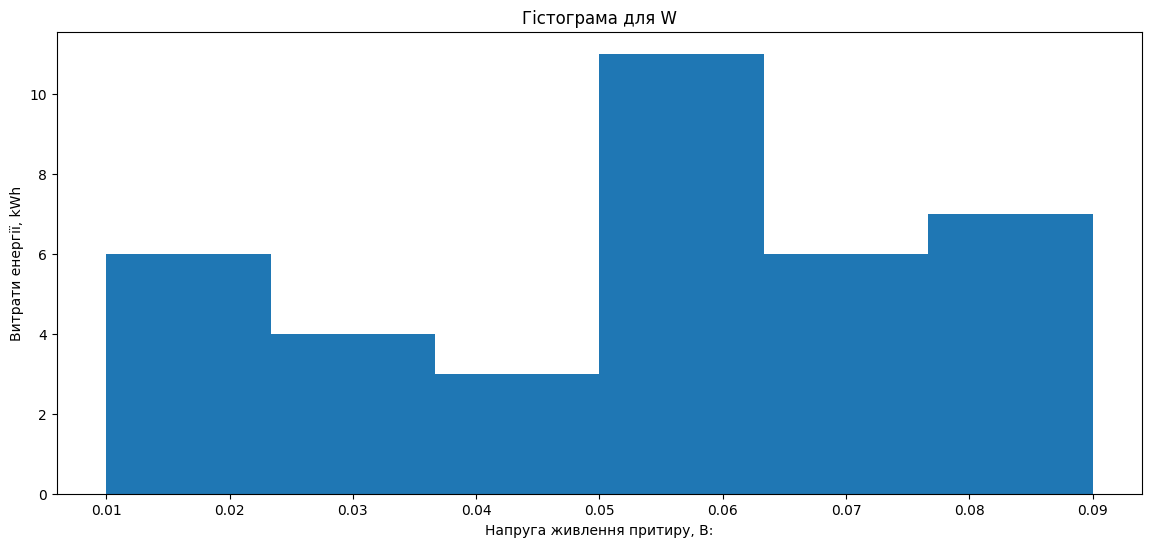

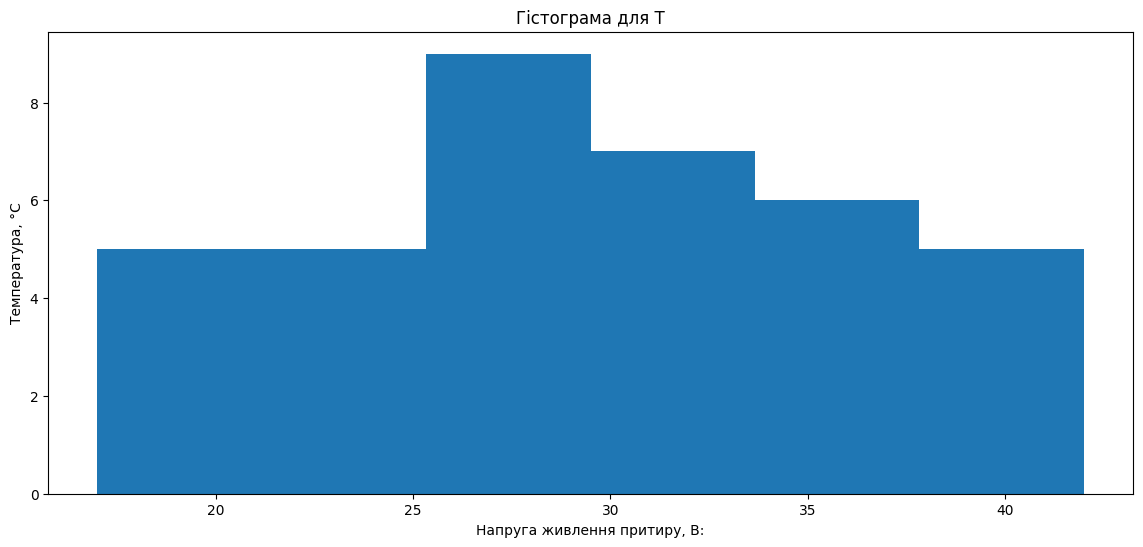

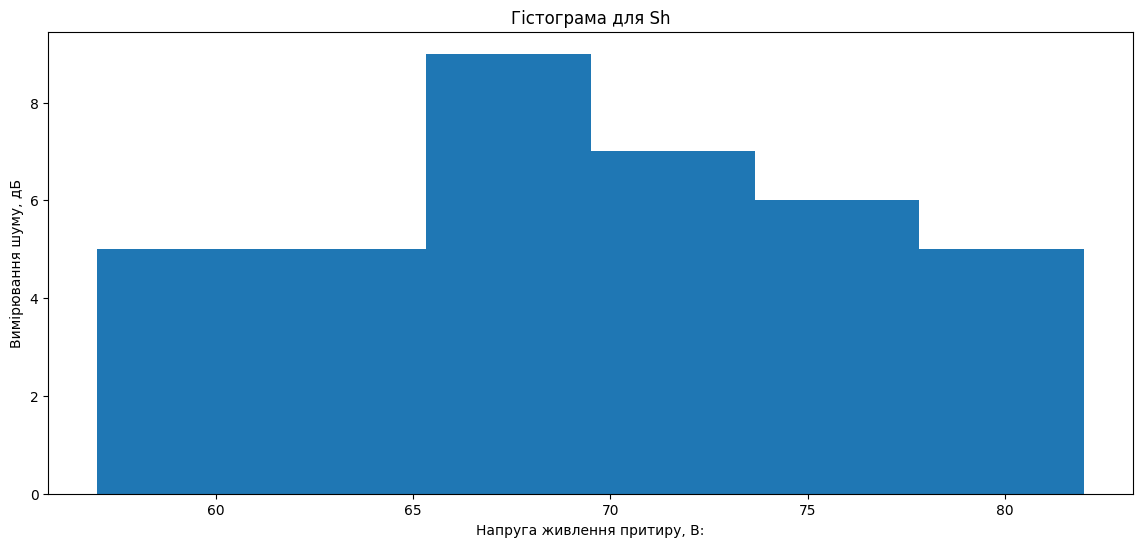

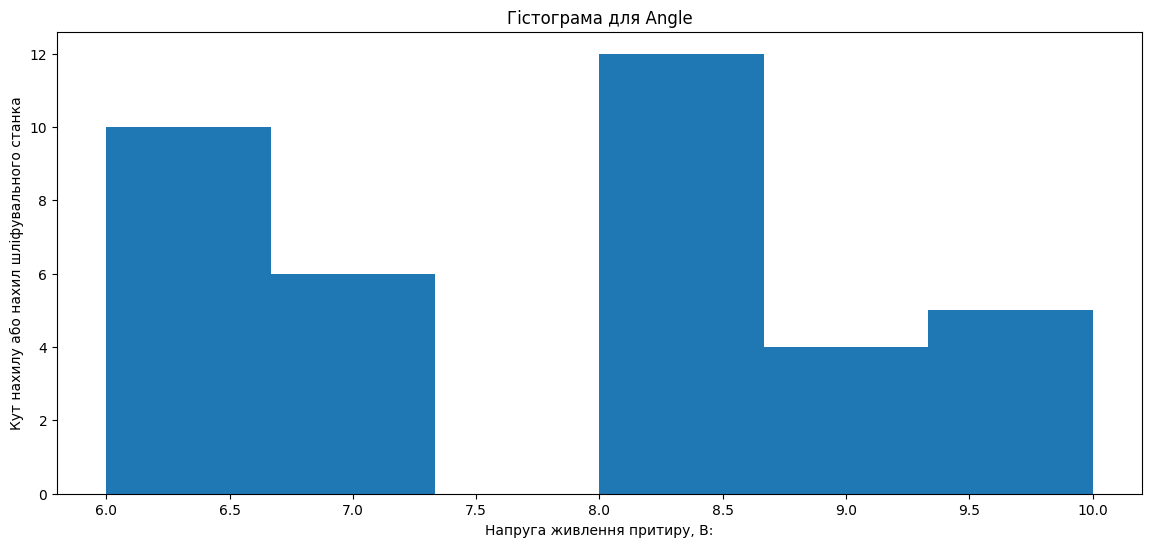

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Описи гістограм
hist_descriptions = {
    'Vpr': {'title': 'Гістограма для Vpr', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Швидкість притиру, мм/сек'},
    'Vngw': {'title': 'Гістограма для Vngw', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Частота обертання шліфувального круга, об/хв'},
    'Vdan': {'title': 'Гістограма для Vdan', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц'},
    'Ppr': {'title': 'Гістограма для Ppr', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Потужність притиру, кВт'},
    'Ef': {'title': 'Гістограма для Ef', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Ефективність (%)'},
    'W': {'title': 'Гістограма для W', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Витрати енергії, kWh'},
    'T': {'title': 'Гістограма для T', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Температура, °C'},
    'Sh': {'title': 'Гістограма для Sh', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Вимірювання шуму, дБ'},
    'Angle': {'title': 'Гістограма для Angle', 'xlabel': 'Напруга живлення притиру, В:', 'ylabel': 'Кут нахилу або нахил шліфувального станка'}
}

num_cols = int(np.sqrt(df.shape[0]))

# Відображення гістограм
for column_name in df.columns:
    if df.dtypes[column_name] != "object":
        ax = df[column_name].plot(kind='hist', bins=num_cols, figsize=(14, 6))

        # Перевірка наявності ключа у словнику перед використанням
        if column_name in hist_descriptions:
            # Додавання описів, якщо ключ існує
            ax.set_title(hist_descriptions[column_name]['title'])
            ax.set_xlabel(hist_descriptions[column_name]['xlabel'])
            ax.set_ylabel(hist_descriptions[column_name]['ylabel'])

        plt.show()


вивести ящики з вусами для числових ознак, дати опис ящикам:
в якому діапазоні зосереджено 25%\50%\75%\100% даних
чи є викиди
чи зміщені ящики вліво\вправо

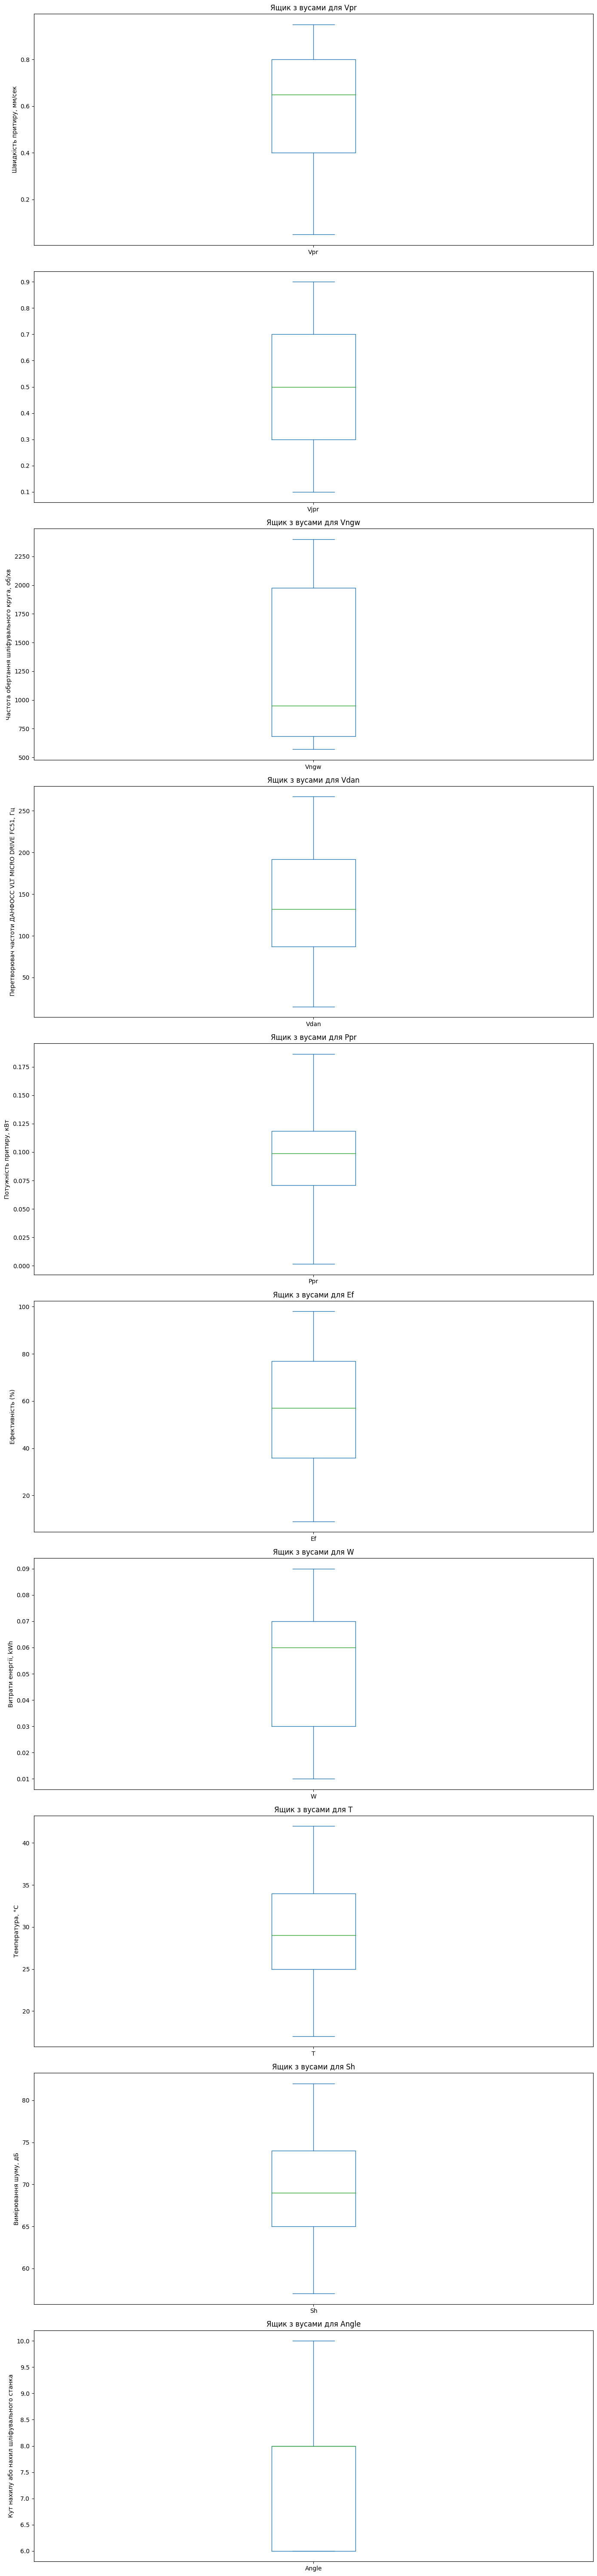

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Описи ящиків з вусами
boxplot_descriptions = {
    'Vpr': {'title': 'Ящик з вусами для Vpr', 'ylabel': 'Швидкість притиру, мм/сек'},
    'Vngw': {'title': 'Ящик з вусами для Vngw', 'ylabel': 'Частота обертання шліфувального круга, об/хв'},
    'Vdan': {'title': 'Ящик з вусами для Vdan', 'ylabel': 'Перетворювач частоти ДАНФОСС VLT MICRO DRIVE FC51, Гц'},
    'Ppr': {'title': 'Ящик з вусами для Ppr', 'ylabel': 'Потужність притиру, кВт'},
    'Ef': {'title': 'Ящик з вусами для Ef', 'ylabel': 'Ефективність (%)'},
    'W': {'title': 'Ящик з вусами для W', 'ylabel': 'Витрати енергії, kWh'},
    'T': {'title': 'Ящик з вусами для T', 'ylabel': 'Температура, °C'},
    'Sh': {'title': 'Ящик з вусами для Sh', 'ylabel': 'Вимірювання шуму, дБ'},
    'Angle': {'title': 'Ящик з вусами для Angle', 'ylabel': 'Кут нахилу або нахил шліфувального станка'}
}

# Створення фігури та осі
fig, axs = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(14, 6*len(df.columns)))

# Відображення ящиків з вусами
for i, column_name in enumerate(df.columns):
    if df.dtypes[column_name] != "object":
        ax = axs[i]
        df[column_name].plot(kind='box', ax=ax)

        # Перевірка наявності ключа у словнику перед використанням
        if column_name in boxplot_descriptions:
            # Додавання описів, якщо ключ існує
            ax.set_title(boxplot_descriptions[column_name]['title'])
            ax.set_ylabel(boxplot_descriptions[column_name]['ylabel'])

plt.tight_layout()
plt.show()


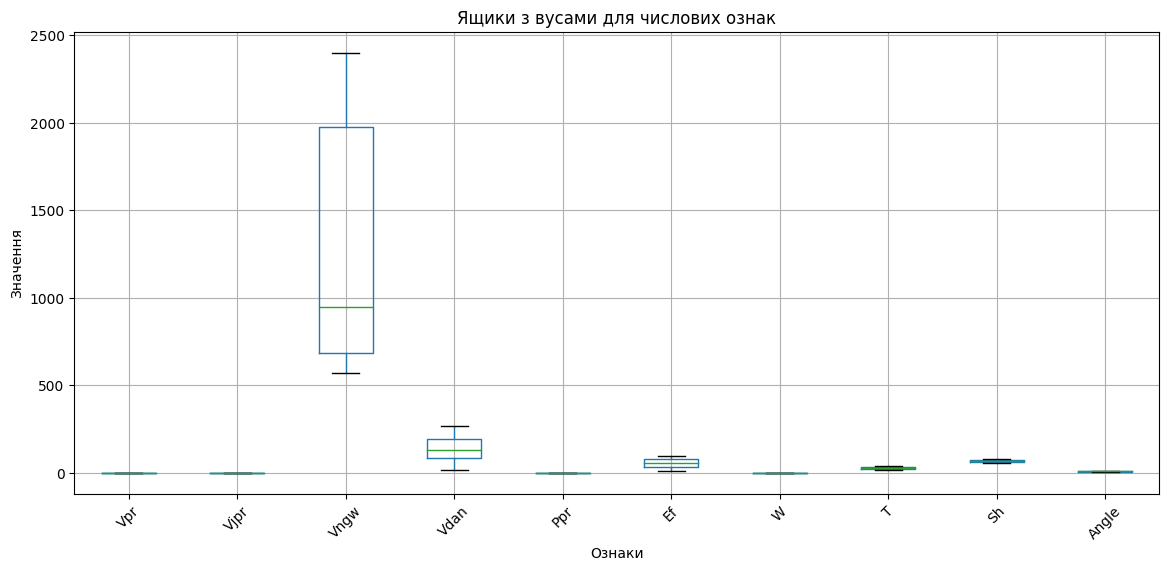

In [41]:
# Відображення ящиків з вусами для всіх числових ознак
plt.figure(figsize=(14, 6))
df.boxplot(rot=45)
plt.title('Ящики з вусами для числових ознак')
plt.ylabel('Значення')
plt.xlabel('Ознаки')
plt.show()



Відображення гістограми для категоріальних ознак

In [42]:

for column_name in df.columns:
    if df.dtypes[column_name] == "object":
        ax = df[column_name].value_counts().plot(kind='bar', figsize=(14, 6))
        ax.set_title(f'Гістограма для {column_name}')
        ax.set_xlabel(column_name)
        ax.set_ylabel('Кількість')
        plt.show()



In [43]:
corr = df.corr(method='pearson')

corr


,Vpr,Vjpr,Vngw,Vdan,Ppr,Ef,W,T,Sh,Angle
Vpr,1.000000,0.516612,0.086227,0.542416,0.216834,0.155235,0.043258,0.271553,0.271553,-0.094399
Vjpr,0.516612,1.000000,0.024292,0.977276,0.173459,-0.129592,-0.082998,0.122691,0.122691,-0.225571
Vngw,0.086227,0.024292,1.000000,-0.009818,0.267154,-0.178879,-0.026177,0.155226,0.155226,-0.023358
Vdan,0.542416,0.977276,-0.009818,1.000000,0.244794,-0.129051,-0.080891,0.127633,0.127633,-0.130767
Ppr,0.216834,0.173459,0.267154,0.244794,1.000000,-0.028561,-0.101307,0.055976,0.055976,0.205194
Ef,0.155235,-0.129592,-0.178879,-0.129051,-0.028561,1.000000,0.030987,-0.140053,-0.140053,0.245954
W,0.043258,-0.082998,-0.026177,-0.080891,-0.101307,0.030987,1.000000,0.185818,0.185818,-0.109502
T,0.271553,0.122691,0.155226,0.127633,0.055976,-0.140053,0.185818,1.000000,1.000000,-0.146079
Sh,0.271553,0.122691,0.155226,0.127633,0.055976,-0.140053,0.185818,1.000000,1.000000,-0.146079
Angle,-0.094399,-0.225571,-0.023358,-0.130767,0.205194,0.245954,-0.109502,-0.146079,-0.146079,1.000000


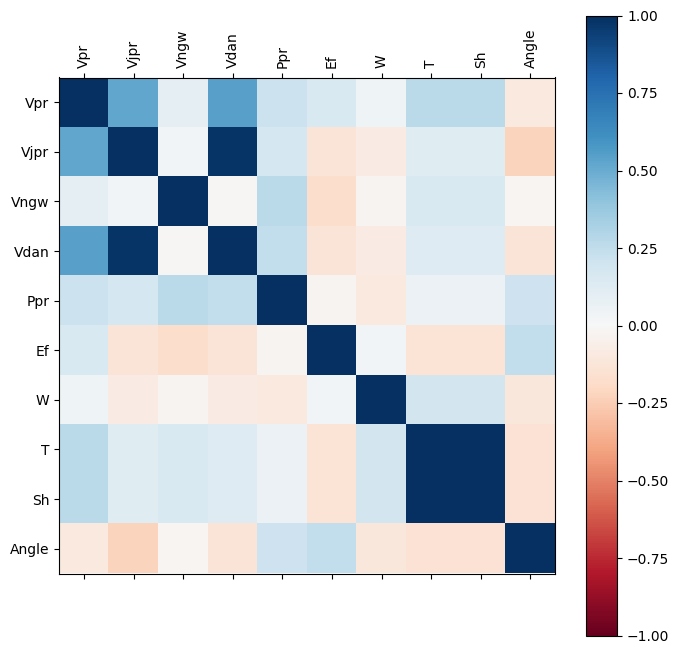

In [44]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

# підписи для рядків та стовпчиків матриці
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)

# кольорова панель
plt.colorbar()
plt.clim(-1, 1)

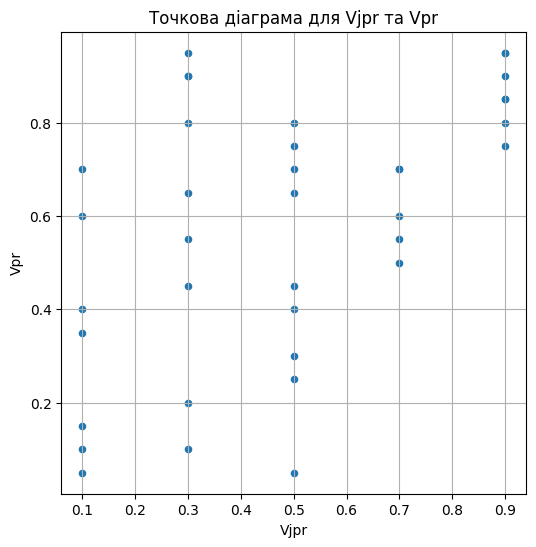

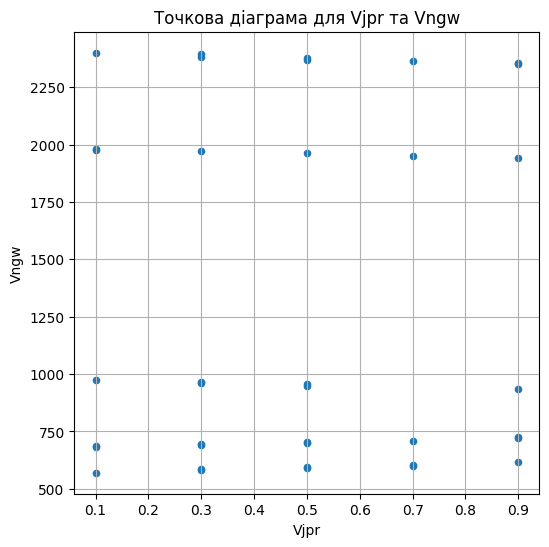

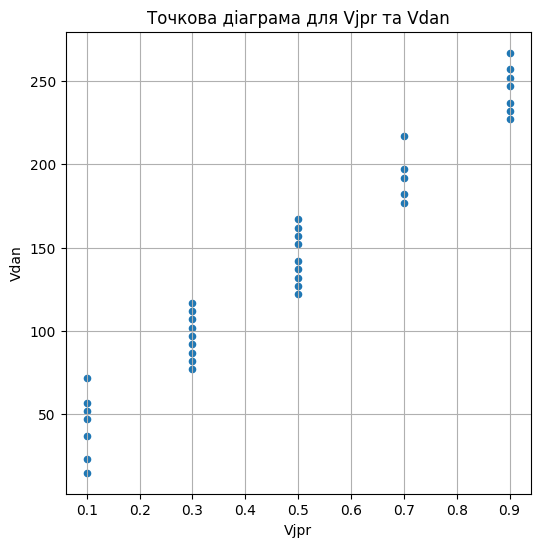

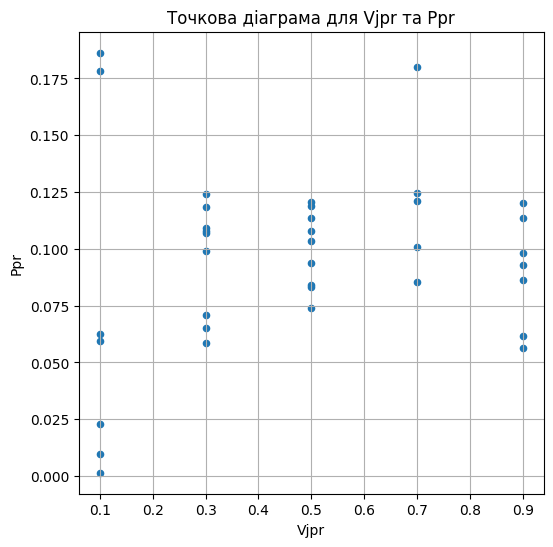

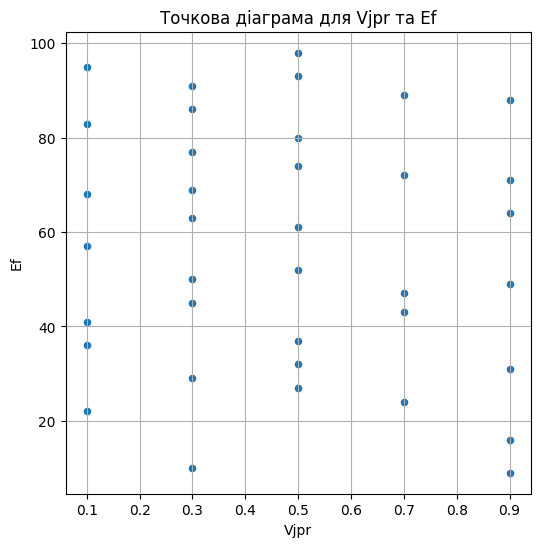

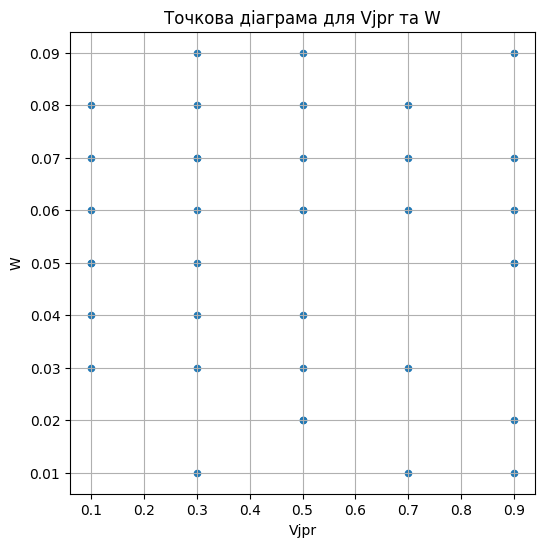

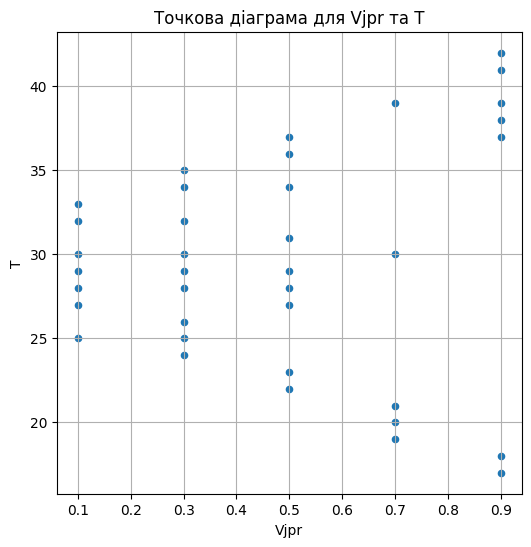

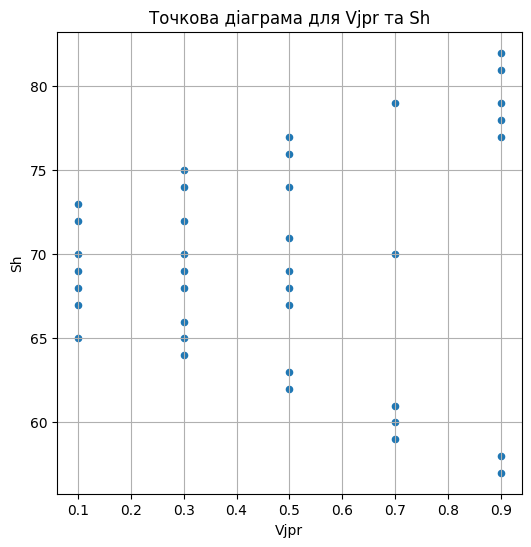

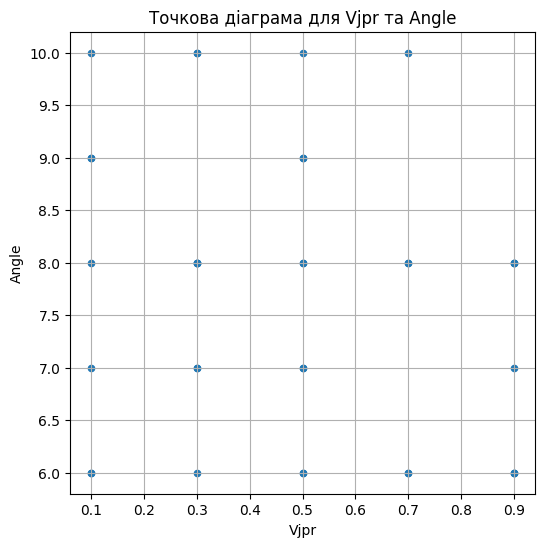

In [45]:
numerical_features = ['Vpr', 'Vngw', 'Vdan', 'Ppr', 'Ef', 'W', 'T', 'Sh', 'Angle']

# Створення точкових діаграм для кожної числової ознаки по відношенню до Vjpr
for feature in numerical_features:
    df.plot(kind='scatter', x='Vjpr', y=feature, figsize=(6,6), title=f'Tочкова діаграма для Vjpr та {feature}')
    plt.xlabel('Vjpr')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()
